# Introdução a Ciência de Dados - Tarefa 02
## Aluno: Vitor Hugo Meneses Beck

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Leitura dos Dados
Iremos fazer a leitura do arquivo disponibilizado para a execução do exercício e imprimir as 10 primeiras linhas para investigar suas caracteristicas

In [2]:
df = pd.read_excel("soja_milho.xlsx")
df.head(10)

,Séries temporais reais de preços dos produtos soja e milho.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"Soja: Indicador de preços de Soja, comercializ...",NaN,NaN,NaN,NaN,NaN
1,"Milho: Indicador de preços de Milho, comercial...",NaN,NaN,NaN,NaN,NaN
2,Fonte: www.cepea.esalq.usp.br,NaN,NaN,NaN,NaN,NaN
3,Período: Dados diários de 02/01/2014 a 30/12/2015,NaN,NaN,NaN,NaN,NaN
4,Total de datas: 498 dias,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,Observação,Data,Mês,Ano - Safra,Preços - Milho,Preços - Soja
7,1,02/01/2014,1,2014,26.64,72.18
8,2,03/01/2014,1,2014,27,71.42
9,3,06/01/2014,1,2014,27.29,71.38


## Caracterização dos Dados
Devemos remover as 6 primeiras linhas dos dados disponibilizados, pois as mesmas não serão utilizadas para os calculos que serão realizados

In [3]:
df = df.drop(df.index[[0,1,2,3,4,5]])
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(6))
df.head(10)

6,Observação,Data,Mês,Ano - Safra,Preços - Milho,Preços - Soja
7,1,02/01/2014,1,2014,26.64,72.18
8,2,03/01/2014,1,2014,27,71.42
9,3,06/01/2014,1,2014,27.29,71.38
10,4,07/01/2014,1,2014,27.49,70.31
11,5,08/01/2014,1,2014,27.16,70.14
12,6,09/01/2014,1,2014,27.17,68.97
13,7,10/01/2014,1,2014,27.17,68.64
14,8,13/01/2014,1,2014,27.32,67.59
15,9,14/01/2014,1,2014,27.35,67.78
16,10,15/01/2014,1,2014,27.3,67.6


Os nomes das colunas serão renomeados para melhor trabalho, removendo assim, acentos, letras maiúsculas e removendo espaços.
A variável data será convertida para o formato 'date' e os campos de preço serão convertidos para números, visto que durante a leitura, tudo foi considerado como 'string'

In [4]:
df.columns = ['observacao', 'data', 'mes', 'ano', 'preco_milho', 'preco_soja']
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df['preco_milho'] = pd.to_numeric(df['preco_milho'])
df['preco_soja'] = pd.to_numeric(df['preco_soja'])
df.head()

,observacao,data,mes,ano,preco_milho,preco_soja
7,1,2014-01-02,1,2014,26.64,72.18
8,2,2014-01-03,1,2014,27.00,71.42
9,3,2014-01-06,1,2014,27.29,71.38
10,4,2014-01-07,1,2014,27.49,70.31
11,5,2014-01-08,1,2014,27.16,70.14


In [5]:
nAmostras = df.shape[0]
df.shape

(498, 6)

Assim, podemos observar que os dados tem a dimensão de 498X5

In [6]:
print("Média preço da soja: ", np.mean(df['preco_soja']))


Média preço da soja:  66.4982730924


In [7]:
print("Mediana preço da soja: ",np.median(df['preco_soja']))

Mediana preço da soja:  65.165


In [8]:
print("Média preço do milho", np.mean(df['preco_milho']))

Média preço do milho 27.9550803213


In [9]:
print("Mediana preço do milho: ", np.median(df['preco_milho']))

Mediana preço do milho:  27.535


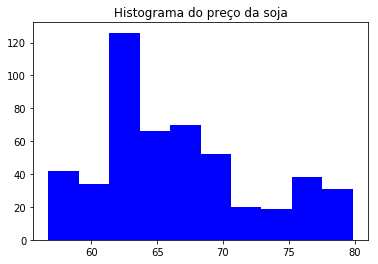

In [10]:
plt.hist(df['preco_soja'], bins=10, color='blue')
plt.title("Histograma do preço da soja")
plt.show()

Pode-se observar que a maior quantidade de valores observados para o preço da soja encontram-se no intervalo entre 60 e 65 reais.

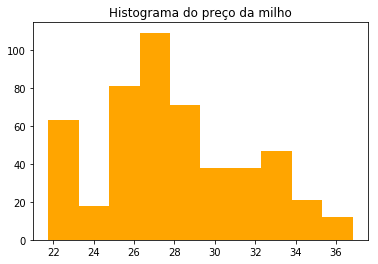

In [11]:
plt.hist(df['preco_milho'], bins=10, color='orange')
plt.title("Histograma do preço da milho")
plt.show()

Pode-se observar que a maior quantidade de valores observados para o preço do milho encontram-se no intervalo entre 24 e 30 reais, possuindo uma maior dispersão que o preço da soja.

## Ánalise de outliers

Boxplot dos preços do milho e da soja, respectivamente.

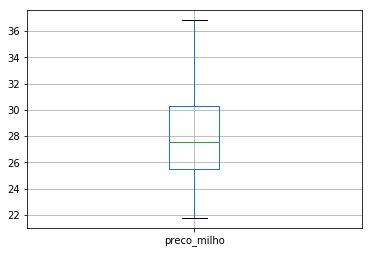

In [12]:
df.boxplot(column=['preco_milho'])
plt.show()

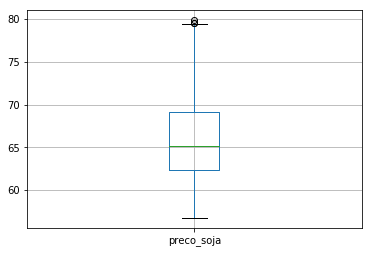

In [13]:
df.boxplot(column=['preco_soja'])
plt.show()

Podemos encontrar alguns valores encontram-se fora do boxplot, sendo assim outliers do preços da soja.

### Gráfico de linha
Gráfico de linha da série histórica dos preços.

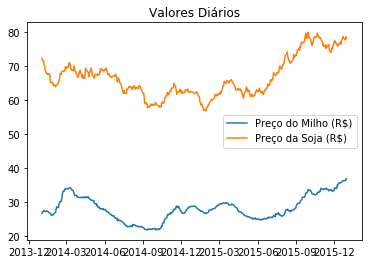

In [14]:
linhaMilho = plt.plot(df['data'], df['preco_milho'], label='Preço do Milho (R$)')
linhaSoja = plt.plot(df['data'], df['preco_soja'], label='Preço da Soja (R$)')
legenda = plt.legend(handles=[linhaMilho[0], linhaSoja[0]])
plt.title('Valores Diários')
plt.show()

Para melhor comparação das séries, iremos normaliza-las, obtendo assim valores entre -1 e 1.

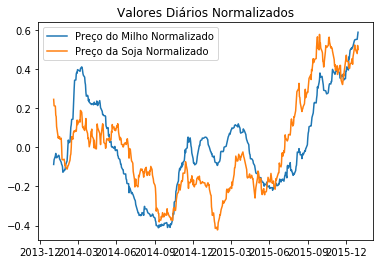

In [15]:
df['preco_milho_norm'] = (df['preco_milho'] - df['preco_milho'].mean())/(df['preco_milho'].max() - df['preco_milho'].min())
df['preco_soja_norm'] = (df['preco_soja'] - df['preco_soja'].mean())/(df['preco_soja'].max() - df['preco_soja'].min())
linhaMilhoNorm = plt.plot(df['data'], df['preco_milho_norm'], label='Preço do Milho Normalizado')
linhaSojaNorm = plt.plot(df['data'], df['preco_soja_norm'], label='Preço da Soja Normalizado')
legenda = plt.legend(handles=[linhaMilhoNorm[0], linhaSojaNorm[0]])
plt.title('Valores Diários Normalizados')
plt.show()

## Análise de covariância e correlação

In [16]:
df.drop('preco_milho_norm', axis=1, inplace=True)
df.drop('preco_soja_norm', axis=1, inplace=True)
df.cov()

,preco_milho,preco_soja
preco_milho,12.698293,15.493658
preco_soja,15.493658,33.689041


A covariância obtida é de 33,68, para uma melhor comparação devemos utilizar a correlação.

In [17]:
df.corr()

,preco_milho,preco_soja
preco_milho,1.000000,0.749095
preco_soja,0.749095,1.000000


O valor de 0,749 indica uma correlação forte entre as duas séries

## Algoritmo de seleção
### Colheita - Definido pelo modelo
Valores selecionados pelo algoritmo como sendo considerados de "Colheita".

In [18]:
df.drop('preco_milho', axis=1, inplace=True)
mask1 = ((df['ano'] == 2014) & (df['preco_soja'] >= float(67)))
mask2 = ((df['ano'] == 2015) & (df['preco_soja'] >= float(58)) & (df['preco_soja'] <= float(62)))
mask = mask1  | mask2 
colheita = df.loc[mask]
print("Total de observações definidos como período de colheita: ", colheita.shape[0])

Total de observações definidos como período de colheita:  134


In [19]:
colheita.head(10)

,observacao,data,mes,ano,preco_soja
7,1,2014-01-02,1,2014,72.18
8,2,2014-01-03,1,2014,71.42
9,3,2014-01-06,1,2014,71.38
10,4,2014-01-07,1,2014,70.31
11,5,2014-01-08,1,2014,70.14
12,6,2014-01-09,1,2014,68.97
13,7,2014-01-10,1,2014,68.64
14,8,2014-01-13,1,2014,67.59
15,9,2014-01-14,1,2014,67.78
16,10,2014-01-15,1,2014,67.60


### Plantio - Definido pelo modelo
Valores selecionados pelo algoritmo como sendo considerados de "Plantio".

In [20]:
plantio = df[~df.isin(colheita)].dropna()
print("Total de observações definidos como período de plantio: ", plantio.shape[0])

Total de observações definidos como período de plantio:  364


In [21]:
plantio.head(10)

,observacao,data,mes,ano,preco_soja
20,14,2014-01-21,1,2014,66.55
21,15,2014-01-22,1,2014,65.07
22,16,2014-01-23,1,2014,65.04
23,17,2014-01-24,1,2014,65.02
24,18,2014-01-27,1,2014,65.10
25,19,2014-01-28,1,2014,64.81
26,20,2014-01-29,1,2014,64.31
27,21,2014-01-30,1,2014,64.50
28,22,2014-01-31,1,2014,64.15
29,23,2014-02-03,2,2014,63.93


### Colheita - Utilizando intervalo de colheita
Valores que estão entre o intervalo de 01/01 a 31/05, que é a epoca da colheita.

In [22]:
maskGroundTruthColheita = (((df['data'] >= '2014-01-01') & (df['data'] <= '2014-05-31')) | 
                ((df['data'] >= '2015-01-01') & (df['data'] <= '2015-05-31')))
groundTruthColheita = df.loc[maskGroundTruthColheita]
nGroundTruthPositivoColheita = groundTruthColheita.shape[0]
print("Total de observações reais para o período de colheita: ", groundTruthColheita.shape[0])

Total de observações reais para o período de colheita:  203


In [23]:
groundTruthColheita.head(10)

,observacao,data,mes,ano,preco_soja
7,1,2014-01-02,1,2014,72.18
8,2,2014-01-03,1,2014,71.42
9,3,2014-01-06,1,2014,71.38
10,4,2014-01-07,1,2014,70.31
11,5,2014-01-08,1,2014,70.14
12,6,2014-01-09,1,2014,68.97
13,7,2014-01-10,1,2014,68.64
14,8,2014-01-13,1,2014,67.59
15,9,2014-01-14,1,2014,67.78
16,10,2014-01-15,1,2014,67.60


### Plantio - Utilizando intervalo de colheita
Valores que estão fora do intervalo de 01/01 a 31/05.

In [24]:
grounTruthPlantio = df[~df.isin(groundTruthColheita)].dropna()
print("Total de observações reais para o período de plantio: ", grounTruthPlantio.shape[0])

Total de observações reais para o período de plantio:  295


In [25]:
grounTruthPlantio.head(10)

,observacao,data,mes,ano,preco_soja
109,103,2014-06-02,6,2014,69.05
110,104,2014-06-03,6,2014,68.95
111,105,2014-06-04,6,2014,69.30
112,106,2014-06-05,6,2014,69.02
113,107,2014-06-06,6,2014,68.31
114,108,2014-06-09,6,2014,67.38
115,109,2014-06-10,6,2014,67.69
116,110,2014-06-11,6,2014,67.59
117,111,2014-06-12,6,2014,67.52
118,112,2014-06-13,6,2014,66.84


### Falsos Positivos - Falsa Colheita
Valores que foram considerados como colheita pelo modelo apresentado, porém encontram-se fora do período de colheita.

In [26]:
falsoPositivo = colheita[~colheita.isin(groundTruthColheita)].dropna()
nFalsoPositivo = falsoPositivo.shape[0]
print("Total de observações definidas de forma errada como colheita", nFalsoPositivo)

Total de observações definidas de forma errada como colheita 15


In [27]:
falsoPositivo.head(15)

,observacao,data,mes,ano,preco_soja
109,103,2014-06-02,6,2014,69.05
110,104,2014-06-03,6,2014,68.95
111,105,2014-06-04,6,2014,69.30
112,106,2014-06-05,6,2014,69.02
113,107,2014-06-06,6,2014,68.31
114,108,2014-06-09,6,2014,67.38
115,109,2014-06-10,6,2014,67.69
116,110,2014-06-11,6,2014,67.59
117,111,2014-06-12,6,2014,67.52
123,117,2014-06-23,6,2014,67.06


Como pode-se observar os valores acima foram definidos pelo algoritmo como do período de colheita, porém os mesmos não estão dentro do intervalo onde é realizada a colheita

### Falsos Negativos - Falso Plantio
Valores que foram considerados como plantio pelo modelo apresentado, porém encontram-se dentro do período de colheita.

In [28]:
falsoNegativo = plantio[~plantio.isin(grounTruthPlantio)].dropna()
nFalsoNegativo = falsoNegativo.shape[0]
print("Total de observações definidas de forma errada como plantio", nFalsoNegativo)

Total de observações definidas de forma errada como plantio 84


In [29]:
falsoNegativo.head(10)

,observacao,data,mes,ano,preco_soja
20,14,2014-01-21,1,2014,66.55
21,15,2014-01-22,1,2014,65.07
22,16,2014-01-23,1,2014,65.04
23,17,2014-01-24,1,2014,65.02
24,18,2014-01-27,1,2014,65.10
25,19,2014-01-28,1,2014,64.81
26,20,2014-01-29,1,2014,64.31
27,21,2014-01-30,1,2014,64.50
28,22,2014-01-31,1,2014,64.15
29,23,2014-02-03,2,2014,63.93


Como pode-se observar, os valores foram selecionados como plantio, porém se encontram dentro do período de colheita(01/01 até 31/05)

### Verdadeiro Positivo - Verdadeiro Colheita
valores que algoritmo acertou em prever como colheita

In [30]:
verdadeiroPositivo = colheita[~colheita.isin(falsoPositivo)].dropna()
nVerdadeiroPositivo = verdadeiroPositivo.shape[0]
print("Foram previstos {} valores de forma correta como colheita".format(nVerdadeiroPositivo))

Foram previstos 119 valores de forma correta como colheita


### Verdadeiro Negativo - Verdadeiro Plantio
valores que o algoritmo acertou em prever como plantio

In [31]:
verdadeiroNegativo = plantio[~plantio.isin(falsoNegativo)].dropna()
nVerdadeiroNegativo = verdadeiroNegativo.shape[0]
print("Foram previstos {} valores de forma correta como plantio".format(nVerdadeiroNegativo))

Foram previstos 280 valores de forma correta como plantio


In [32]:
acuracia = (nVerdadeiroNegativo + nVerdadeiroPositivo)/df.shape[0]
sensibilidade = nVerdadeiroPositivo/(nVerdadeiroPositivo + nFalsoNegativo)
especifidade = nVerdadeiroNegativo/(nVerdadeiroNegativo + nFalsoPositivo)
eficiencia = (sensibilidade + especifidade)/2
ppv = (nVerdadeiroPositivo)/(nVerdadeiroPositivo + nFalsoPositivo)
ppn = (nVerdadeiroNegativo)/(nVerdadeiroNegativo + nFalsoNegativo)

In [33]:
print("Acurácia:", acuracia)
print("Sensibilidade:", sensibilidade )
print("Especifidade:", especifidade )
print("Eficiência:", eficiencia)
print("Preditividade Positiva: ", ppv)
print("Preditividade Negativa: ", ppn)

Acurácia: 0.8012048192771084
Sensibilidade: 0.5862068965517241
Especifidade: 0.9491525423728814
Eficiência: 0.7676797194623027
Preditividade Positiva:  0.8880597014925373
Preditividade Negativa:  0.7692307692307693


### Gráfico ROC
|   | **p** | **n** |
|:-|:-|:-|
| **Y** |  119 | 15  |
| **N** |  84 |  280 |